## Importação das bibliotecas

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Criação dos datasets

In [9]:
inputs = np.array([[0,0], [0,1], [1,0], [1,1]], dtype=float)
AND_targets = np.array([0, 0, 0, 1], dtype=int)
OR_targets = np.array([0, 1, 1, 1], dtype=int)

## Criando a classe Percepton

In [61]:
class Perceptron:
    def __init__(self, input_size, bias = 0, learning_rate = 0.1, max_epochs = 20):
        self.weights = np.random.rand(input_size) * 0.01 # Pesos iniciais pequenos
        self.learning_rate = learning_rate
        self.max_epochs = max_epochs
        self.bias = float(bias)

        # Histórico de pesos e biases
        self.weights_history = []
        self.bias_history = []

    def activation_func (self, x): # Step function
        return 1 if x >= 0 else 0

    def predict(self, x):
        x = np.asarray(x, dtype = float)
        if x.shape[0] != self.weights.shape[0]:
            raise ValueError(f"Esperado input_size={self.weights.shape[0]}, recebido {x.shape[0]}")

        weight_sum = np.dot(self.weights, x) + self.bias
        return self.activation_func(weight_sum)

    def train(self, inputs, targets):
        X = np.array(inputs, dtype=float)
        Y = np.array(targets, dtype=int)

        # Zera o histórico no início do treino e coloca os valores aleatórios iniciais já definidos
        self.weights_history.clear()
        self.weights_history.append(self.weights.copy())
        self.bias_history.clear()
        self.bias_history.append(self.bias)

        for epoch in range(self.max_epochs):
            for i in range(len(X)):
                prediction = self.predict(X[i])
                error = Y[i] - prediction

                # Atualiza pesos e bias
                self.weights += self.learning_rate * error * X[i]
                self.bias += self.learning_rate * error

            # Armazena o histórico no fim da época
            self.weights_history.append(self.weights.copy())
            self.bias_history.append(self.bias)

    def plot_history(self):
        """Plota a evolução dos pesos e do bias ao longo das épocas."""
        if not self.weights_history or not self.bias_history:
            raise RuntimeError("Histórico de pesos e bias não está definido. Treine o modelo antes")

        W = np.vstack(self.weights_history)
        B = np.array(self.bias_history)

        # figura 1: pesos
        plt.figure(figsize=(5,5))
        for j in range(W.shape[1]):
            plt.plot(np.arange(1, W.shape[0] + 1), W[:, j], label=f"w{j}")
        plt.xlabel('Época')
        plt.ylabel('Peso')
        plt.grid(True)
        plt.title('Evolução dos Pesos')
        plt.legend()
        plt.tight_layout()
        plt.show()

        # figura 2: biases
        plt.figure(figsize=(5,5))
        plt.plot(np.arange(1, B.shape[0] + 1), B, label='bias')
        plt.xlabel('Época')
        plt.ylabel('Bias')
        plt.grid(True)
        plt.title('Evolução do Bias')
        plt.legend()
        plt.tight_layout()
        plt.show()

def decision_boundaries(final_weights_and_biases, points):

    xs = np.linspace(-0.5, 1.5, 100)

    plt.figure(figsize=(5,5))

    # desenha cada linha de decisão
    for (w, b) in final_weights_and_biases:
        w0, w1 = w
        if w1 != 0:  # reta normal
            ys = -(w0*xs + b) / w1
            plt.plot(xs, ys, '--')
        else:        # reta vertical
            x_vert = -b / w0 if w0 != 0 else 0
            plt.axvline(x_vert, linestyle='--')

    # desenha os pontos guia (0,0), (0,1), (1,0), (1,1)
    points = np.asarray(points)
    plt.scatter(points[:,0], points[:,1], c='blue', marker='o')

    plt.xlim(-0.5, 1.5)
    plt.ylim(-0.5, 1.5)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title("Linhas de Decisão")
    plt.grid(True)
    plt.show()


## Testando a implementação da classe

In [55]:
# instanciando para AND e para OR
perceptron_AND = Perceptron(input_size=2, learning_rate=0.1, max_epochs=20)
perceptron_OR = Perceptron(input_size=2, learning_rate=0.1, max_epochs=20)

#Treinando os Perceptrons
perceptron_AND.train(inputs, AND_targets)
perceptron_OR.train(inputs, OR_targets)

# Verificando resultado do treinamento
print([perceptron_AND.predict(x) for x in inputs])
print([perceptron_OR.predict(x) for x in inputs])


[0, 0, 0, 1]
[0, 1, 1, 1]


## Plotando alguns gráficos de evolução dos pesos e biases

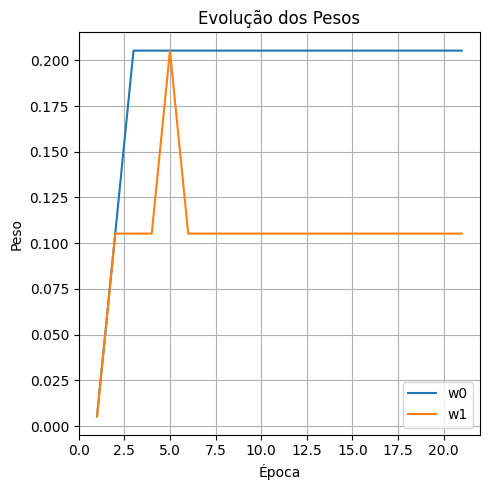

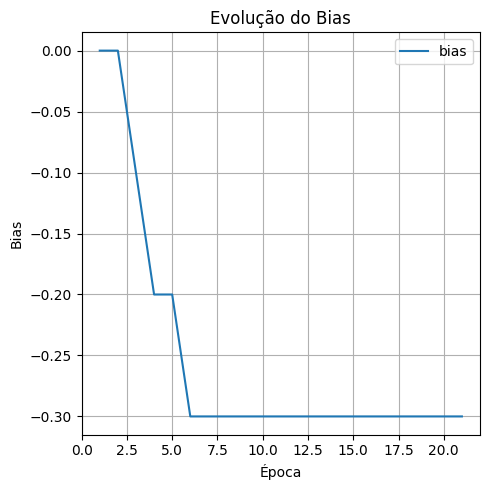

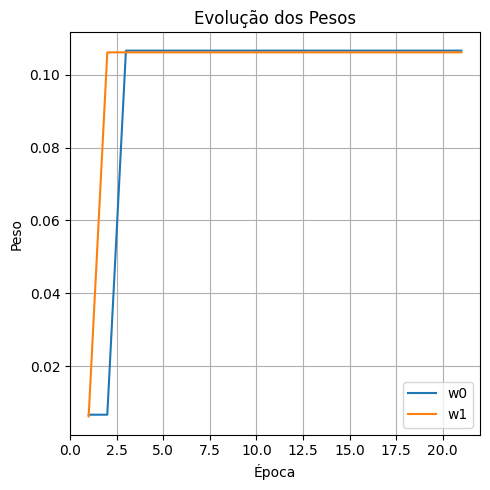

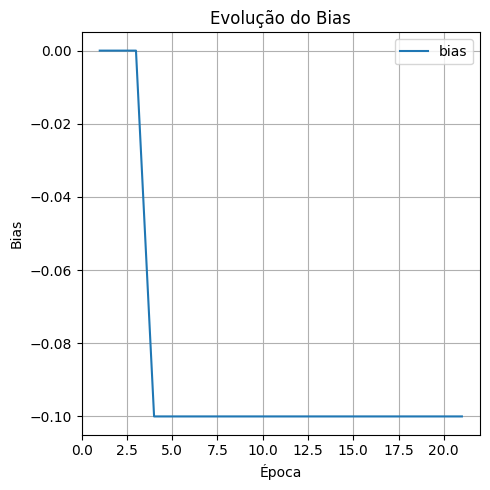

In [56]:
perceptron_AND.plot_history()
perceptron_OR.plot_history()

## Verificando a não-unicidade das soluções para os pesos

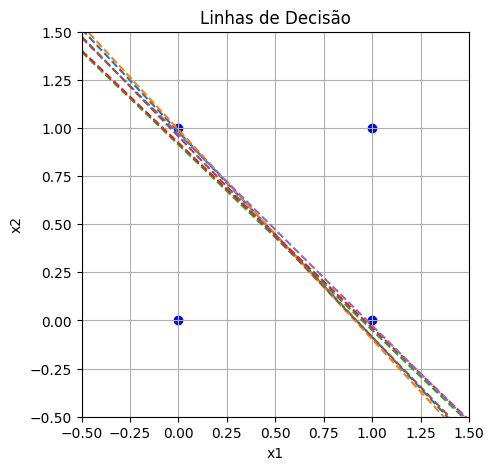

In [62]:
solutions = []
for seed in range (6):
    p = Perceptron(input_size=2, learning_rate=0.1, max_epochs=20)
    p.train(inputs, OR_targets)
    solutions.append((p.weights.copy(), p.bias))

decision_boundaries(solutions, inputs)

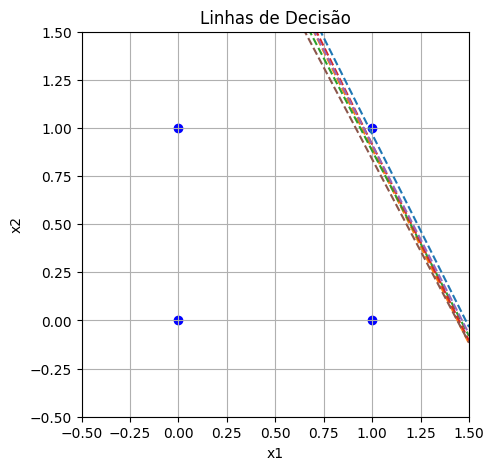

In [63]:
solutions = []
for seed in range (6):
    p = Perceptron(input_size=2, learning_rate=0.1, max_epochs=20)
    p.train(inputs, AND_targets)
    solutions.append((p.weights.copy(), p.bias))

decision_boundaries(solutions, inputs)

## Respostas do exercício

### 1)
 já realizada com o código

### 2)

O perceptron sempre converge em problemas linearmente separáveis, como as portas lógicas AND e OR. No entanto, a forma como essa convergência acontece depende diretamente dos pesos sinápticos iniciais e dos parâmetros de treinamento. Pesos e bias diferentes no início deslocam a fronteira de decisão já na primeira época, o que pode acelerar ou retardar o processo. Se os valores iniciais estiverem próximos de uma solução adequada, o número de ajustes necessários será menor; caso contrário, o algoritmo percorrerá um caminho mais longo até corrigir todos os erros. A taxa de aprendizado também exerce papel importante: taxas maiores produzem saltos maiores nos ajustes, o que pode reduzir o número de épocas, mas às vezes gera oscilações até estabilizar; taxas menores tornam a evolução dos pesos mais suave, porém podem exigir mais épocas para convergir. O bias inicial funciona como um deslocamento da reta de separação e pode facilitar ou dificultar o acerto desde o começo. Além disso, o número máximo de épocas age apenas como um limitador externo: se for pequeno demais, pode interromper o treinamento antes da convergência. Em resumo, pesos e bias iniciais, taxa de aprendizado e limite de épocas não alteram a garantia de convergência em dados separáveis, mas influenciam diretamente a velocidade e o caminho dessa convergência, o que pode ser observado claramente nos gráficos de evolução de pesos e bias.

### 3)

Outro aspecto relevante do perceptron é que a solução encontrada não é única. Em problemas separáveis como a porta OR, existem infinitas retas capazes de dividir corretamente os exemplos das duas classes. O algoritmo encontra apenas uma dessas retas, e a escolha depende da combinação de pesos e bias iniciais, da taxa de aprendizado e até da ordem em que os padrões de entrada são apresentados. Ao variar esses fatores e treinar várias vezes, o histórico dos pesos mostra trajetórias distintas e, ao final, as retas de separação traçadas apresentam inclinações e posições diferentes. Apesar disso, todas classificam corretamente os pontos de treino. Esse comportamento evidencia que o perceptron não busca uma única “reta ótima”, mas qualquer fronteira linear que resolva o problema. Portanto, ao plotar várias linhas obtidas em execuções distintas, observa-se um conjunto de separadores diferentes, reforçando a ideia de que a solução encontrada pelo perceptron depende das condições iniciais e que a fronteira de decisão final é não única.